In [225]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [226]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

In [227]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [228]:
df.head()

age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0

In [229]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [232]:
from sklearn.tree import DecisionTreeClassifier

In [233]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [234]:
!pip install six

In [235]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [236]:
import graphviz

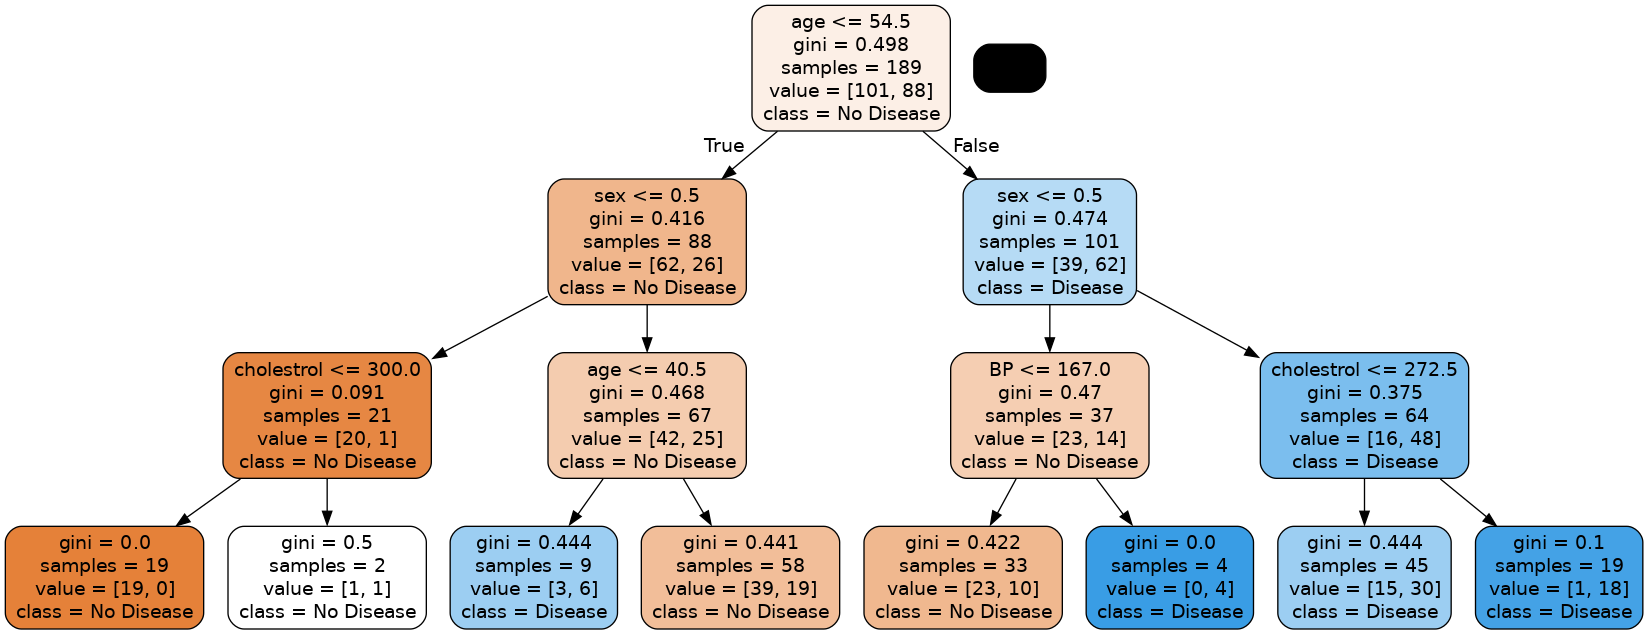

In [237]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

#### Evaluating model performance

In [238]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [239]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [240]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]])

In [241]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]])

Creating helper functions to evaluate model performance and help plot the decision tree

In [242]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [243]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### Without setting any hyper-parameters

In [244]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

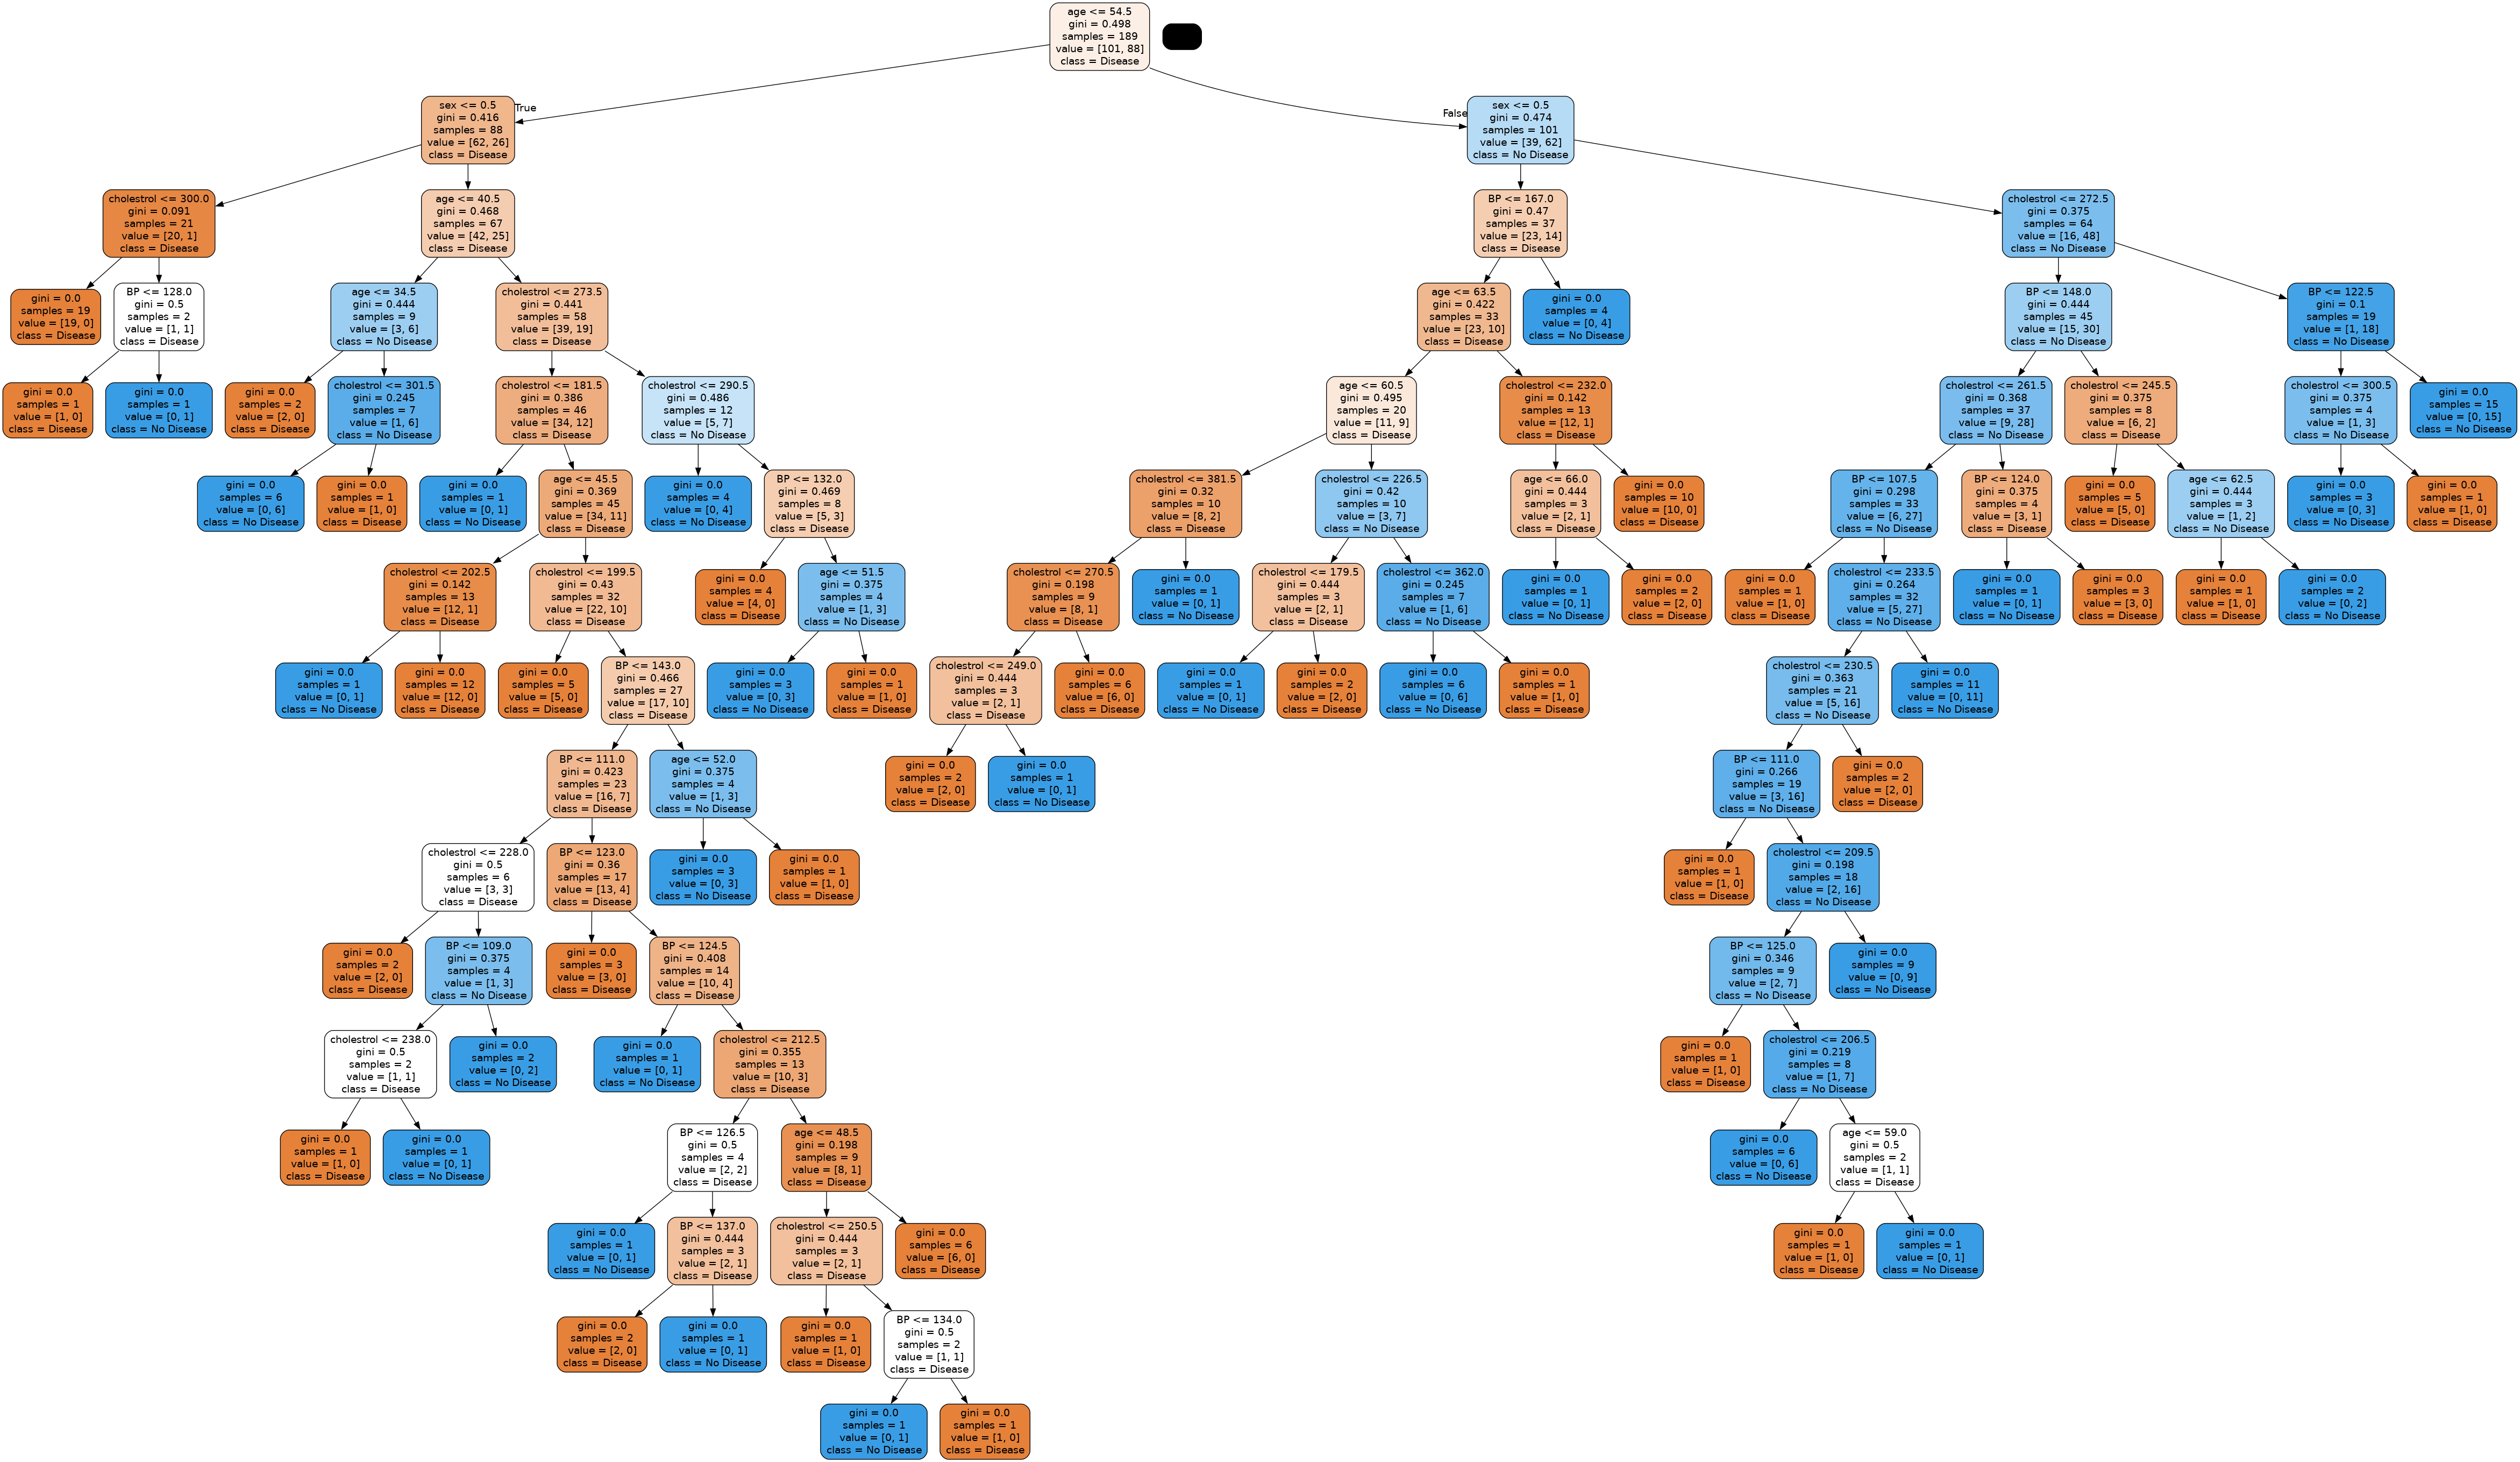

In [245]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [246]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[31 18]
 [12 20]]


### Controlling the depth of the tree

In [247]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o

In [248]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

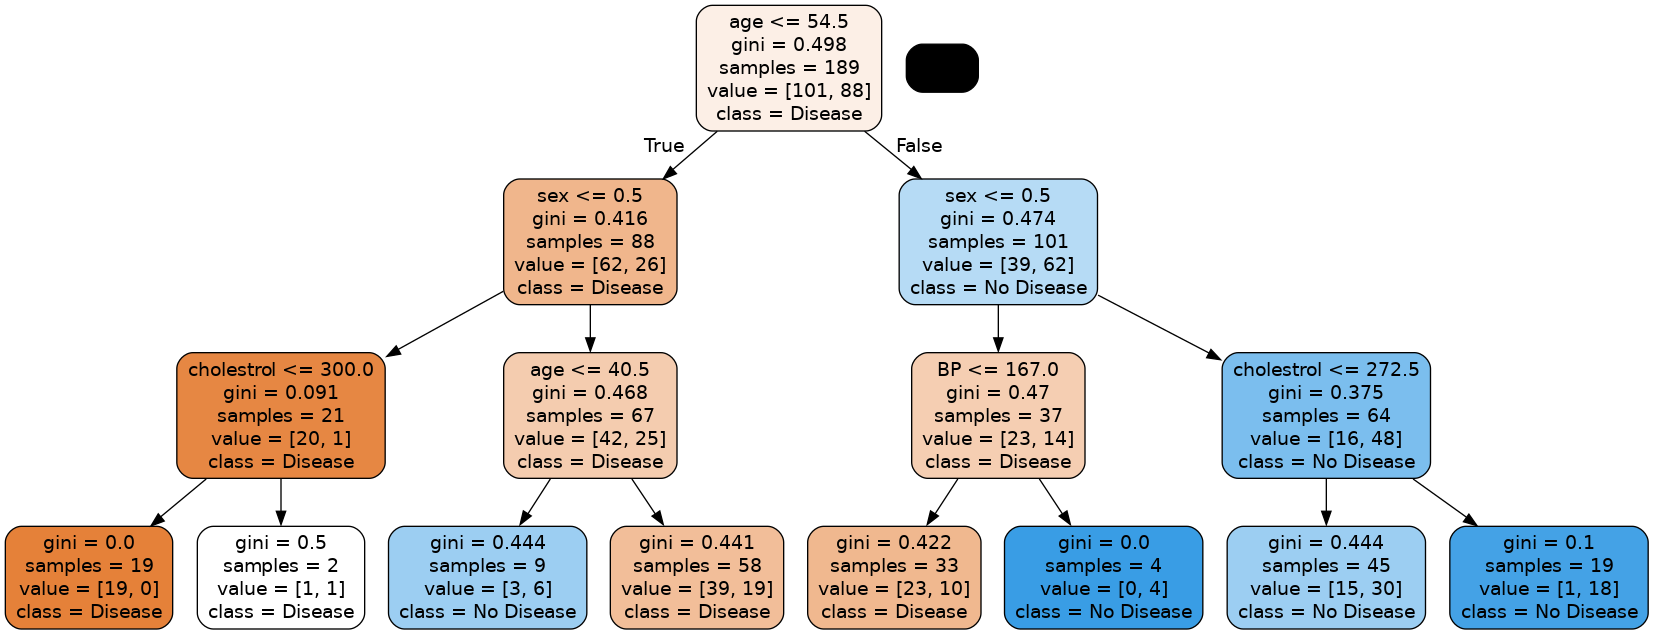

In [249]:
gph = get_dt_graph(dt_depth) 
Image(gph.create_png())

In [250]:
evaluate_model(dt_depth)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


### Specifying minimum samples before split

In [251]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

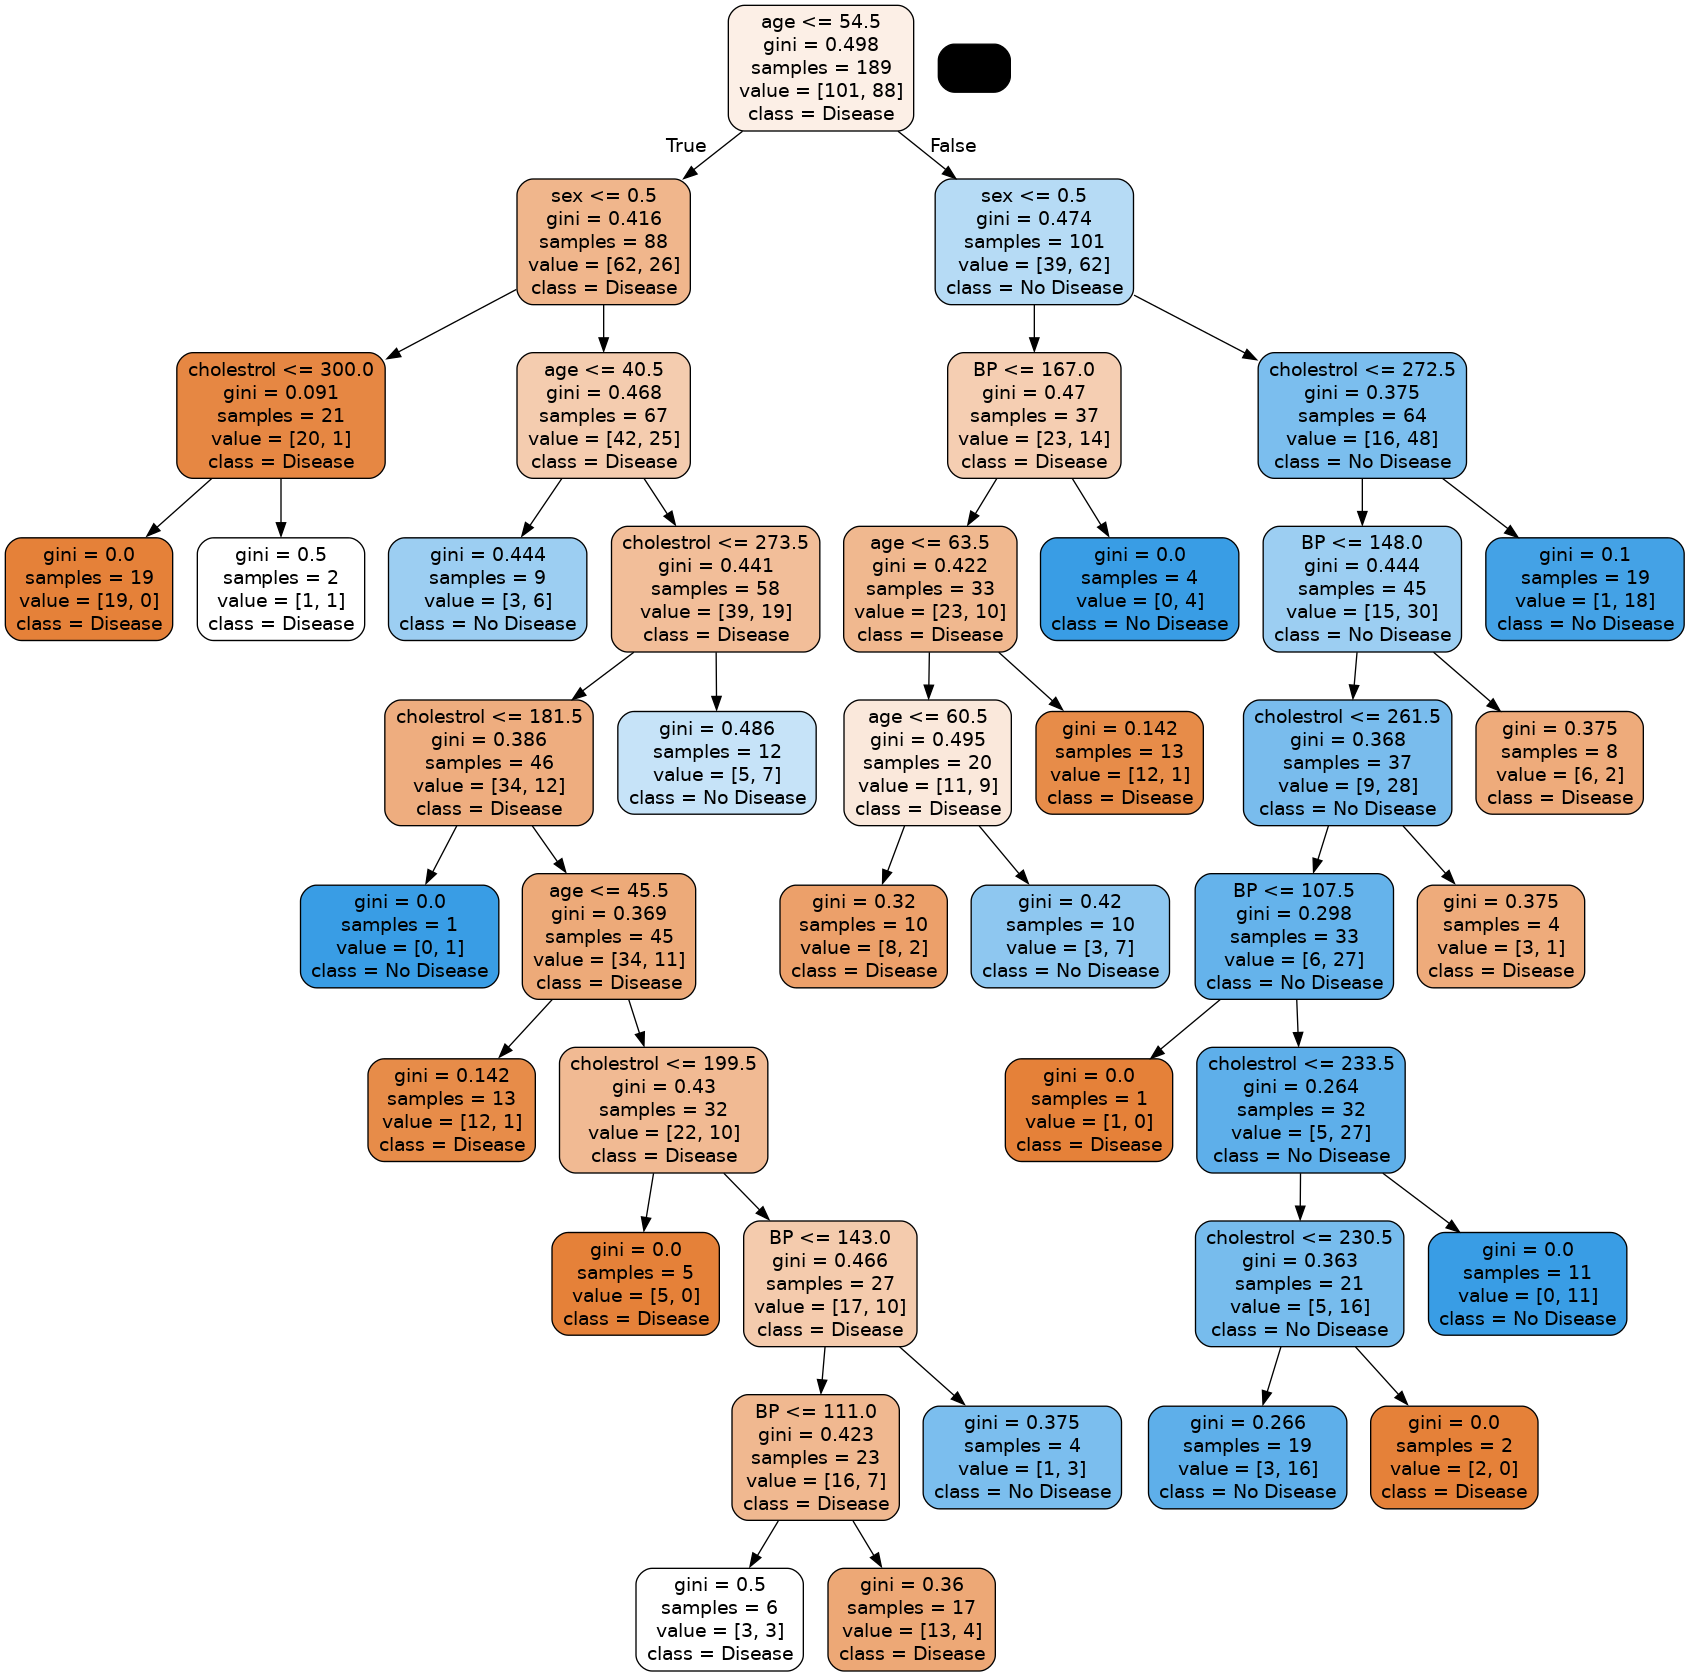

In [252]:
gph = get_dt_graph(dt_min_split) 
Image(gph.create_png())

In [253]:
evaluate_model(dt_min_split)

Train Accuracy : 0.8359788359788359
Train Confusion Matrix:
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[32 17]
 [12 20]]


### Specifying minimum samples in leaf node

In [254]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

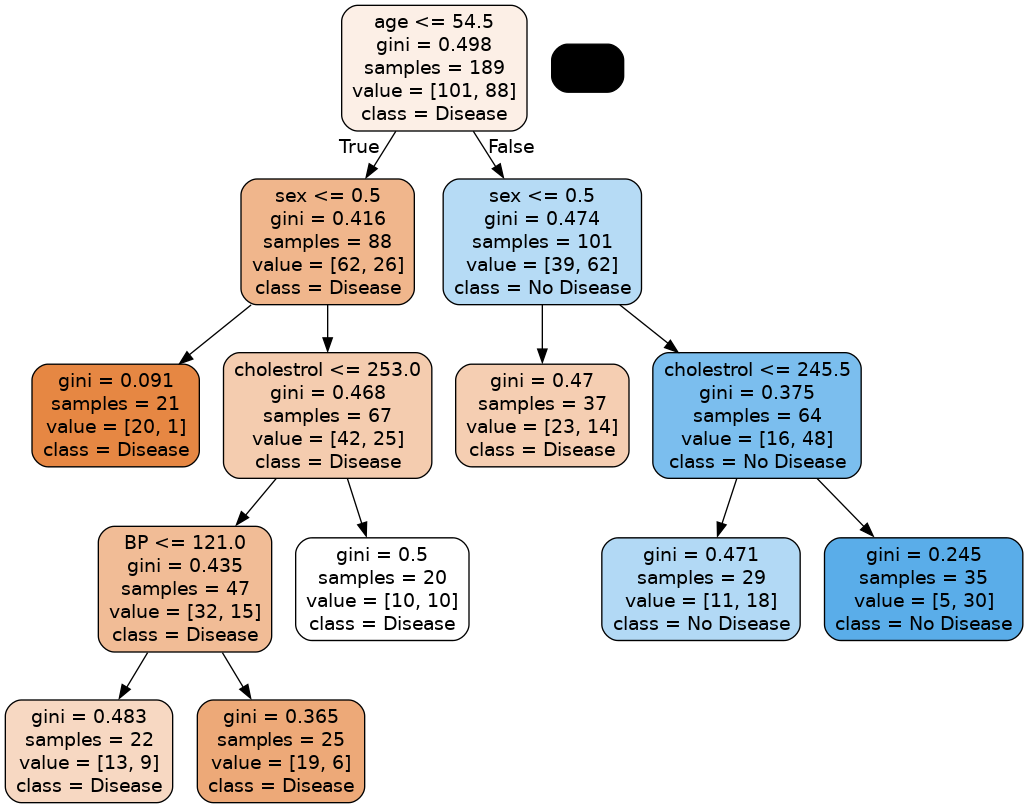

In [255]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [256]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Using Entropy instead of Gini

In [257]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

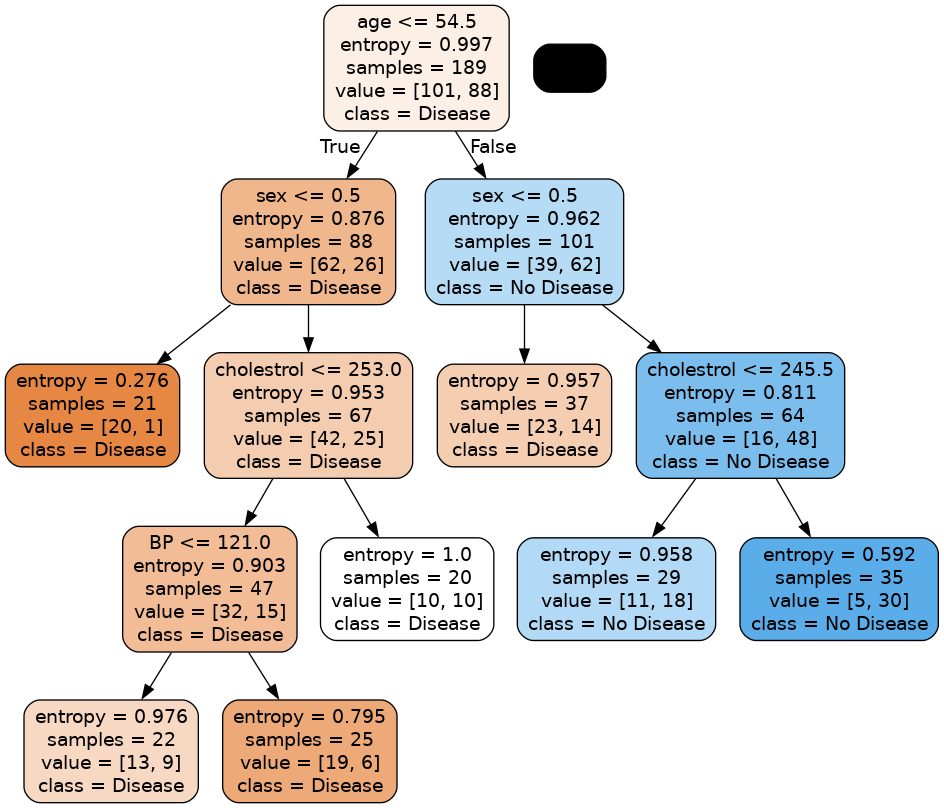

In [258]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [259]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Hyper-parameter tuning

In [260]:
dt = DecisionTreeClassifier(random_state=42)

In [261]:
from sklearn.model_selection import GridSearchCV

In [262]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [263]:
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [264]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [265]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 33.6 ms, sys: 8.94 ms, total: 42.5 ms
Wall time: 77.8 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [266]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001362      0.000124         0.000614        0.000022   
1       0.000913      0.000155         0.000575        0.000080   
2       0.000924      0.000128         0.000538        0.000031   
3       0.000711      0.000025         0.000498        0.000018   
4       0.000689      0.000014         0.000501        0.000009   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.708333   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.708333   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.687500   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.666667   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.541667   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.744681           0.617021           0.531915         0.650488   
1           0.744681           0.617021           0.531915         0.650488   
2           0.744681           0.617021           0.531915         0.645279   
3           0.680851           0.574468           0.702128         0.656028   
4           0.531915           0.531915           0.531915         0.534353   

   std_test_score  rank_test_score  
0        0.082762               18  
1        0.082762               18  
2        0.079551               20  
3        0.048751                8  
4        0.004223               41

In [267]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
30       0.000829      0.000091         0.000660        0.000202   
6        0.000747      0.000028         0.000499        0.000009   
31       0.001030      0.000210         0.000554        0.000079   
5        0.000855      0.000143         0.000617        0.000099   
11       0.000818      0.000085         0.000514        0.000016   

   param_criterion param_max_depth param_min_samples_leaf  \
30         entropy               3                      5   
6             gini               3                     10   
31         entropy               3                     10   
5             gini               3                      5   
11            gini               5                     10   

                                               params  split0_test_score  \
30  {'criterion': 'entropy', 'max_depth': 3, 'min_...           0.604167   
6   {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.645833   
31  {'criterion': 'entropy', 'max_depth': 3, 'min_...           0.625000   
5   {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.625000   
11  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.645833   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
30           0.765957           0.617021           0.680851         0.666999   
6            0.744681           0.595745           0.680851         0.666777   
31           0.744681           0.595745           0.680851         0.661569   
5            0.744681           0.595745           0.659574         0.656250   
11           0.723404           0.595745           0.659574         0.656139   

    std_test_score  rank_test_score  
30        0.064090                1  
6         0.054202                2  
31        0.056898                3  
5         0.055831                4  
11        0.045525                5

In [268]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [269]:
dt_best = grid_search.best_estimator_

In [270]:
evaluate_model(dt_best)

Train Accuracy : 0.7195767195767195
Train Confusion Matrix:
[[82 19]
 [34 54]]
--------------------------------------------------
Test Accuracy : 0.6172839506172839
Test Confusion Matrix:
[[36 13]
 [18 14]]


In [271]:
from sklearn.metrics import classification_report

In [272]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        49
           1       0.52      0.44      0.47        32

    accuracy                           0.62        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.61      0.62      0.61        81



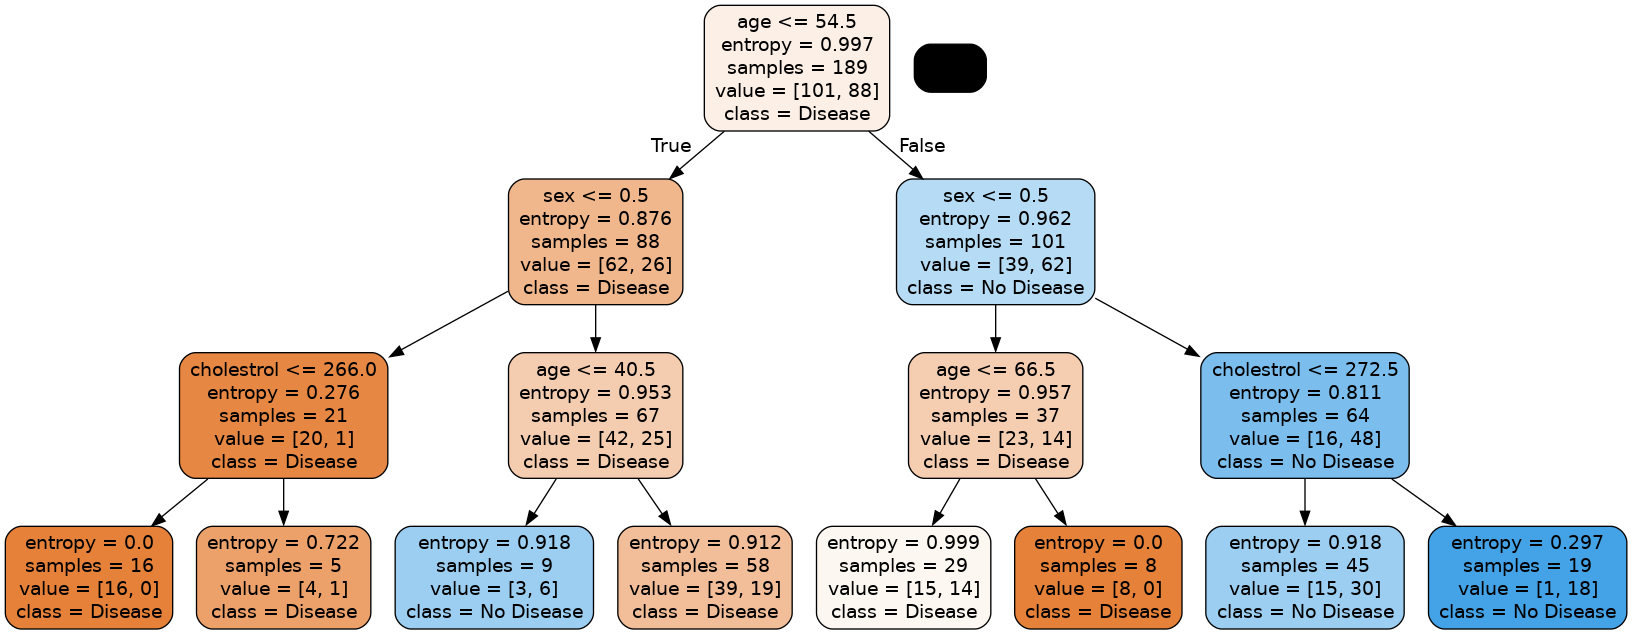

In [273]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

## Random Forest

In [274]:
from sklearn.ensemble import RandomForestClassifier

In [275]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [276]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [277]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1608637542)

In [278]:
sample_tree = rf.estimators_[4]

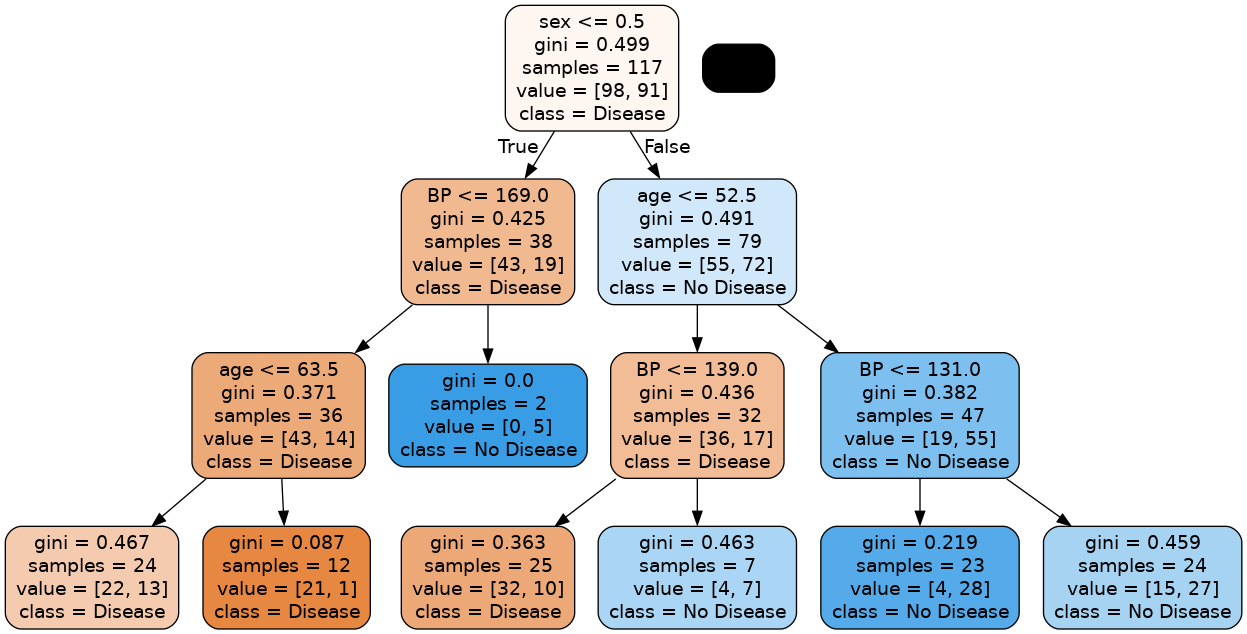

In [279]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=700, height=700)

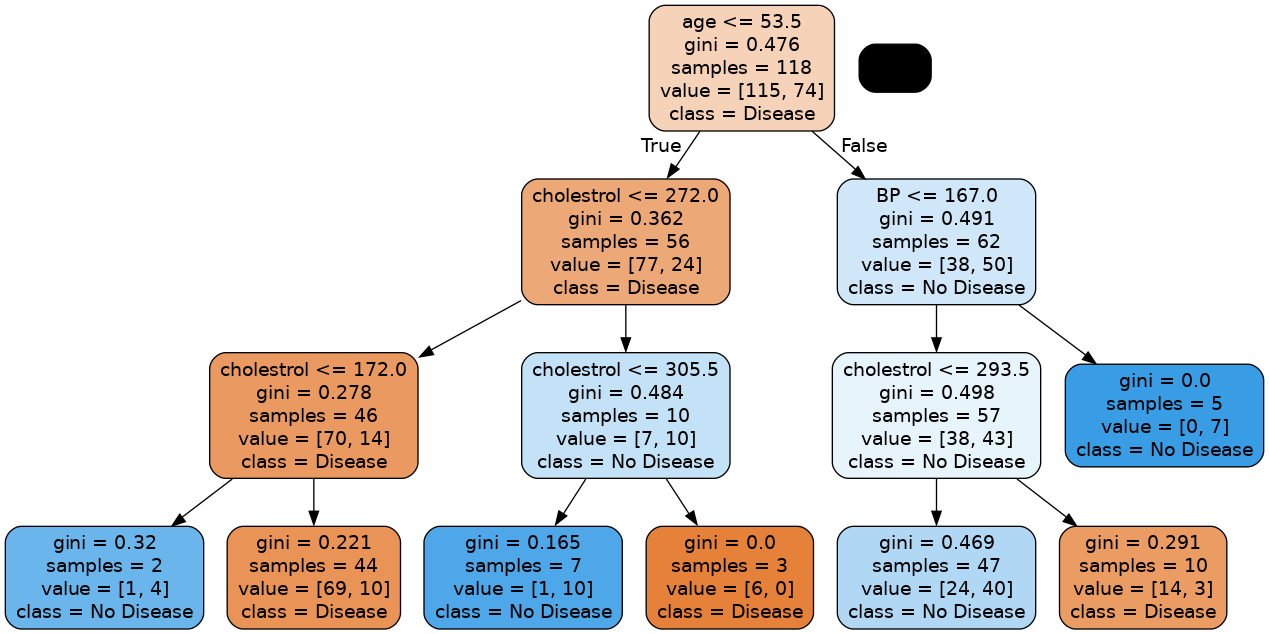

In [280]:
gph = get_dt_graph(rf.estimators_[2])
Image(gph.create_png(), width=700, height=700)

In [281]:
evaluate_model(rf)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[80 21]
 [28 60]]
--------------------------------------------------
Test Accuracy : 0.6172839506172839
Test Confusion Matrix:
[[35 14]
 [17 15]]


#### Grid search for hyper-parameter tuning

In [282]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [283]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [284]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [285]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
CPU times: user 381 ms, sys: 37.8 ms, total: 419 ms
Wall time: 23.5 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [286]:
rf_best = grid_search.best_estimator_

In [287]:
rf_best

RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [288]:
evaluate_model(rf_best)

Train Accuracy : 0.8253968253968254
Train Confusion Matrix:
[[88 13]
 [20 68]]
--------------------------------------------------
Test Accuracy : 0.8271604938271605
Test Confusion Matrix:
[[44  5]
 [ 9 23]]


In [289]:
sample_tree = rf_best.estimators_[0]

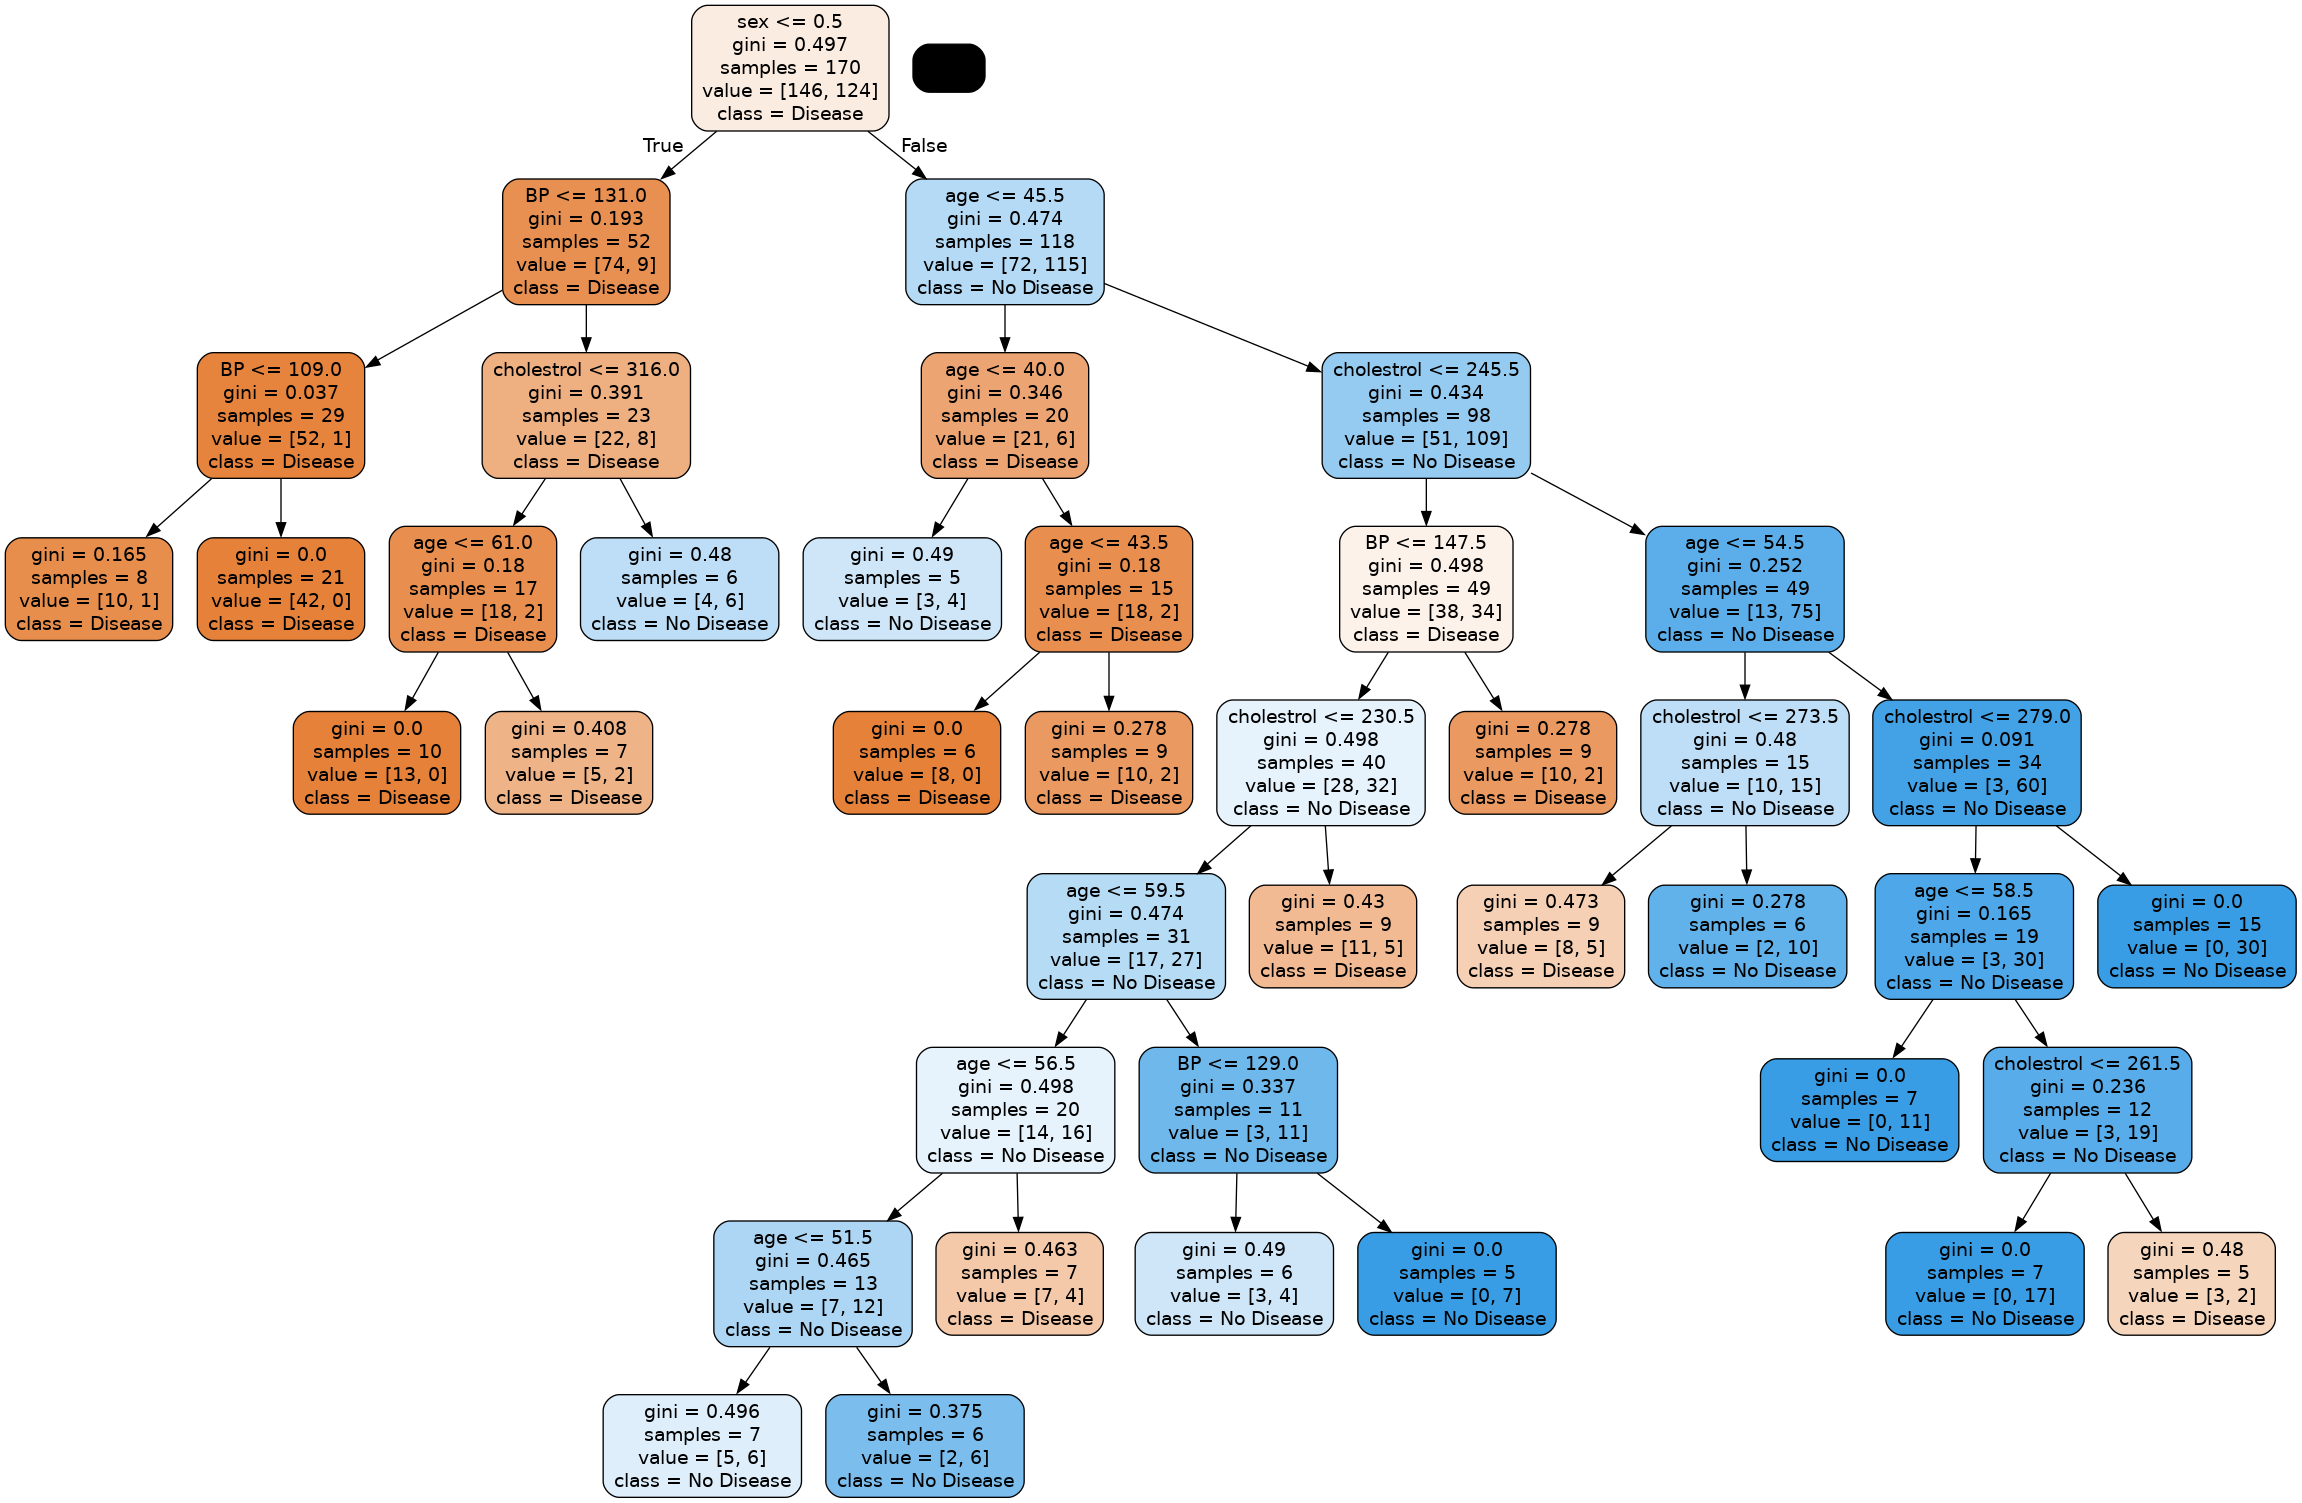

In [290]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

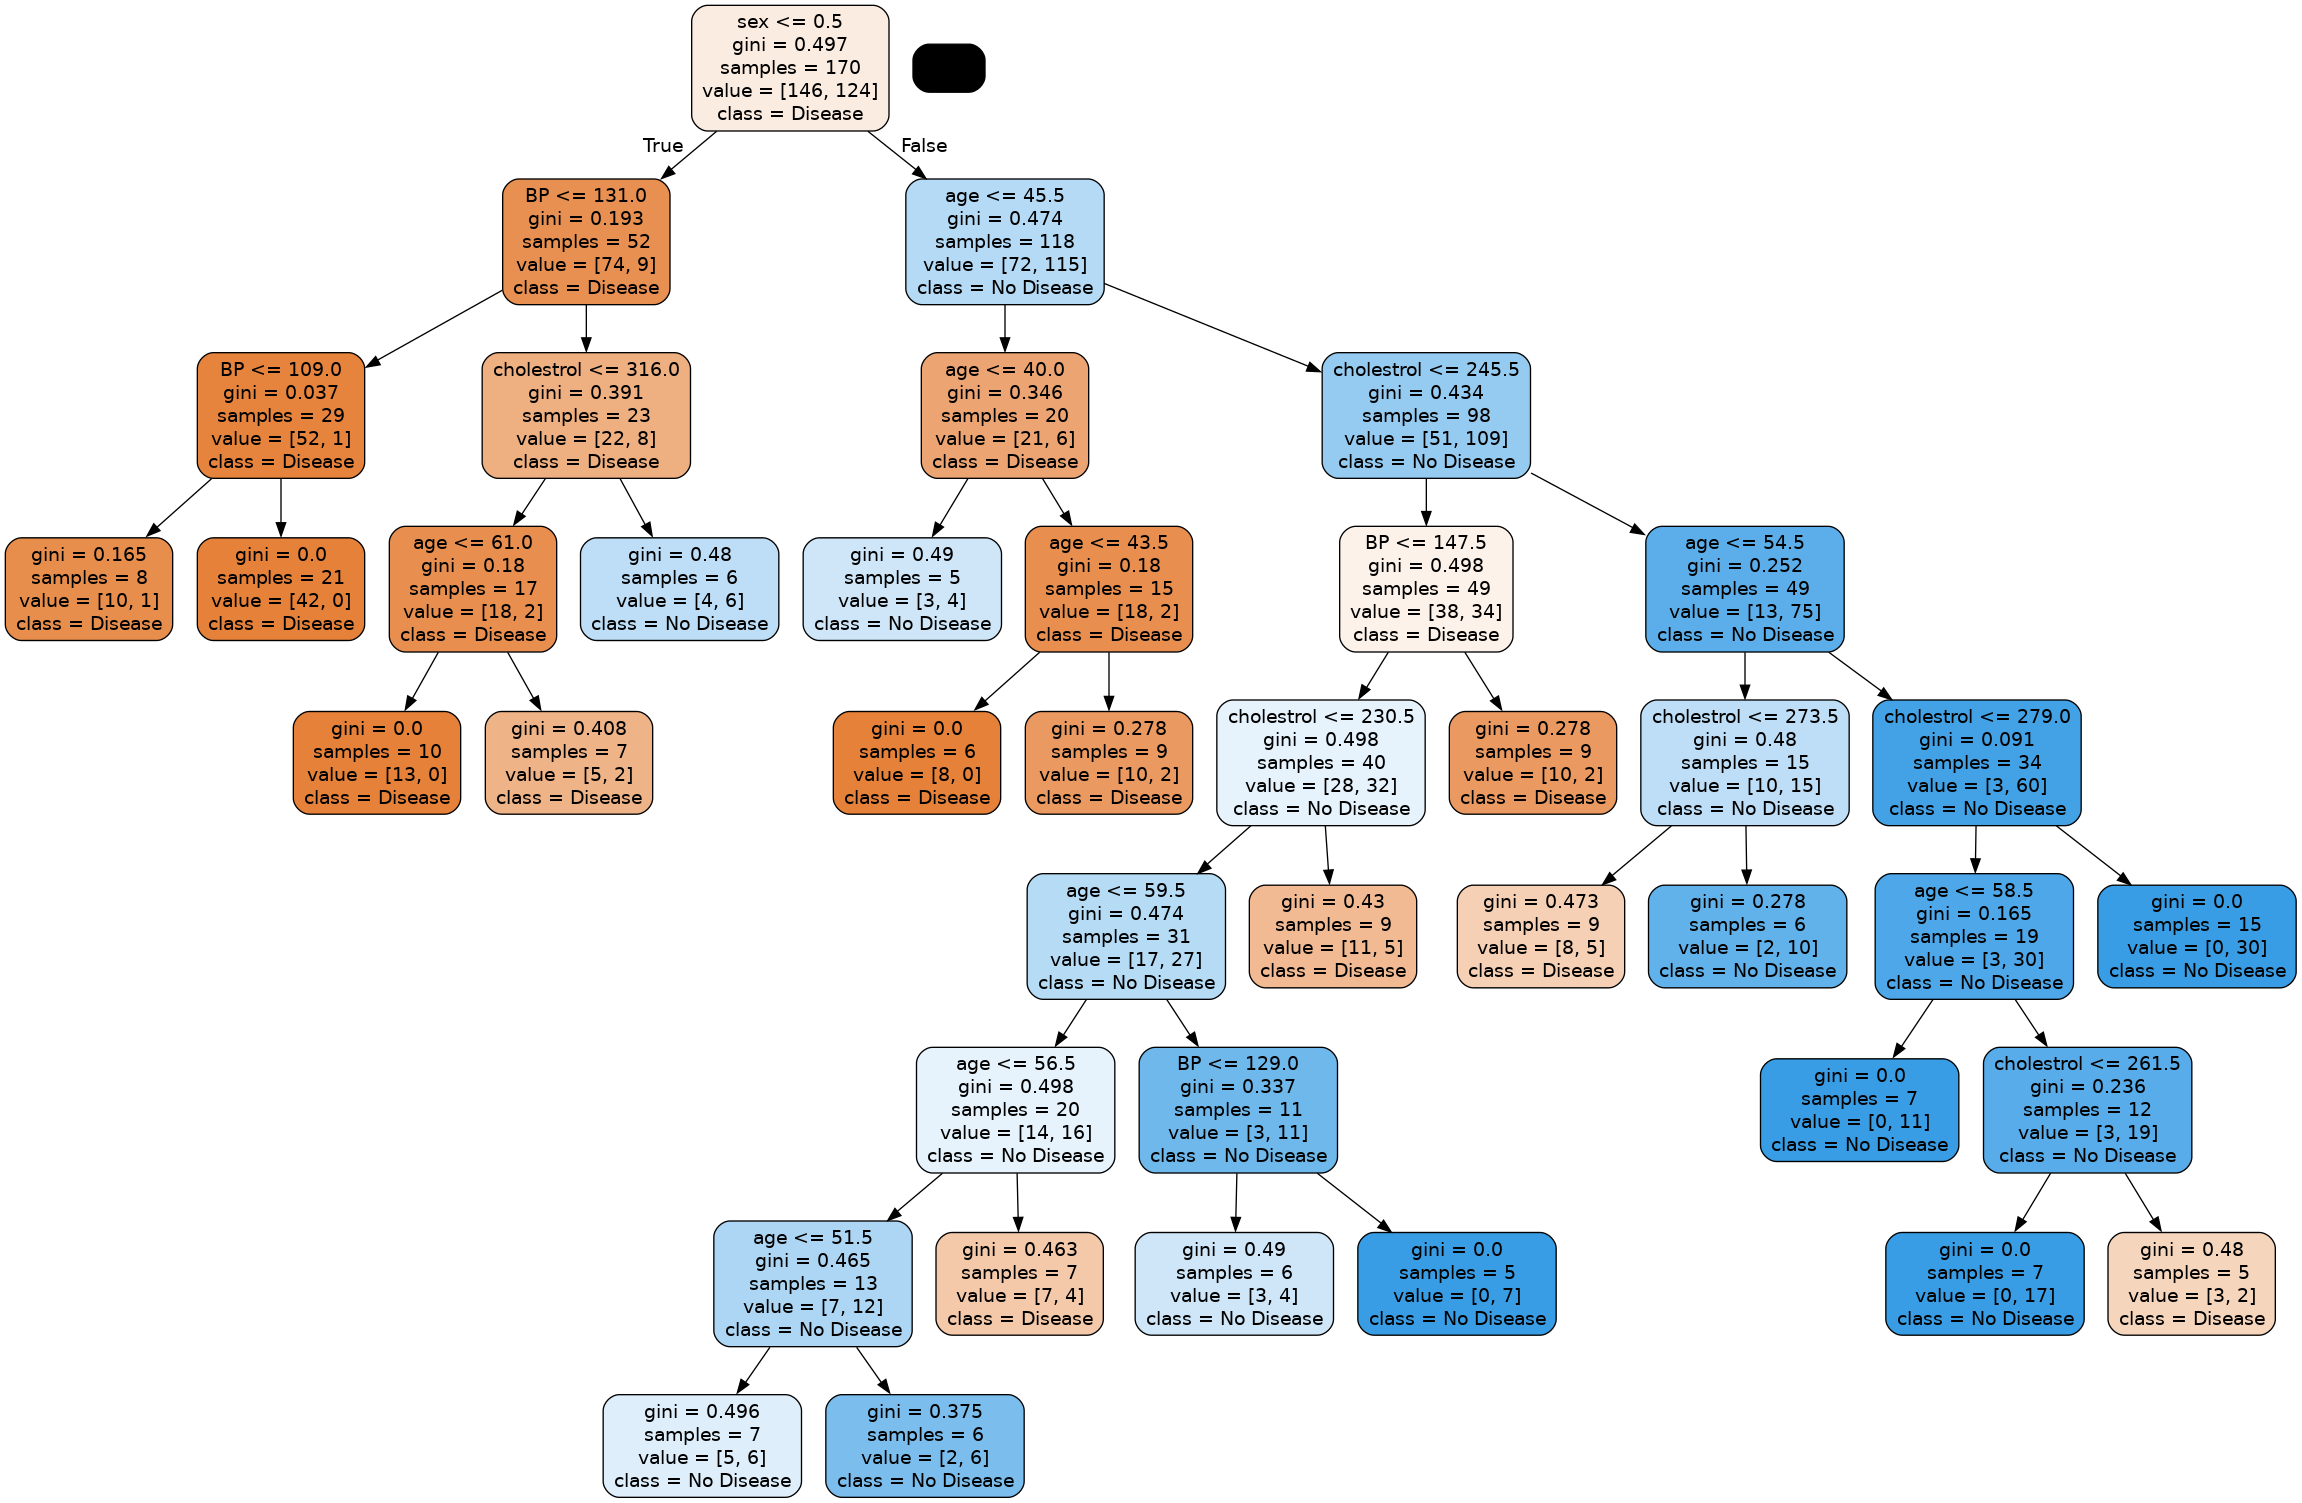

In [291]:
gph = get_dt_graph(rf_best.estimators_[0])
Image(gph.create_png(), height=600, width=600)

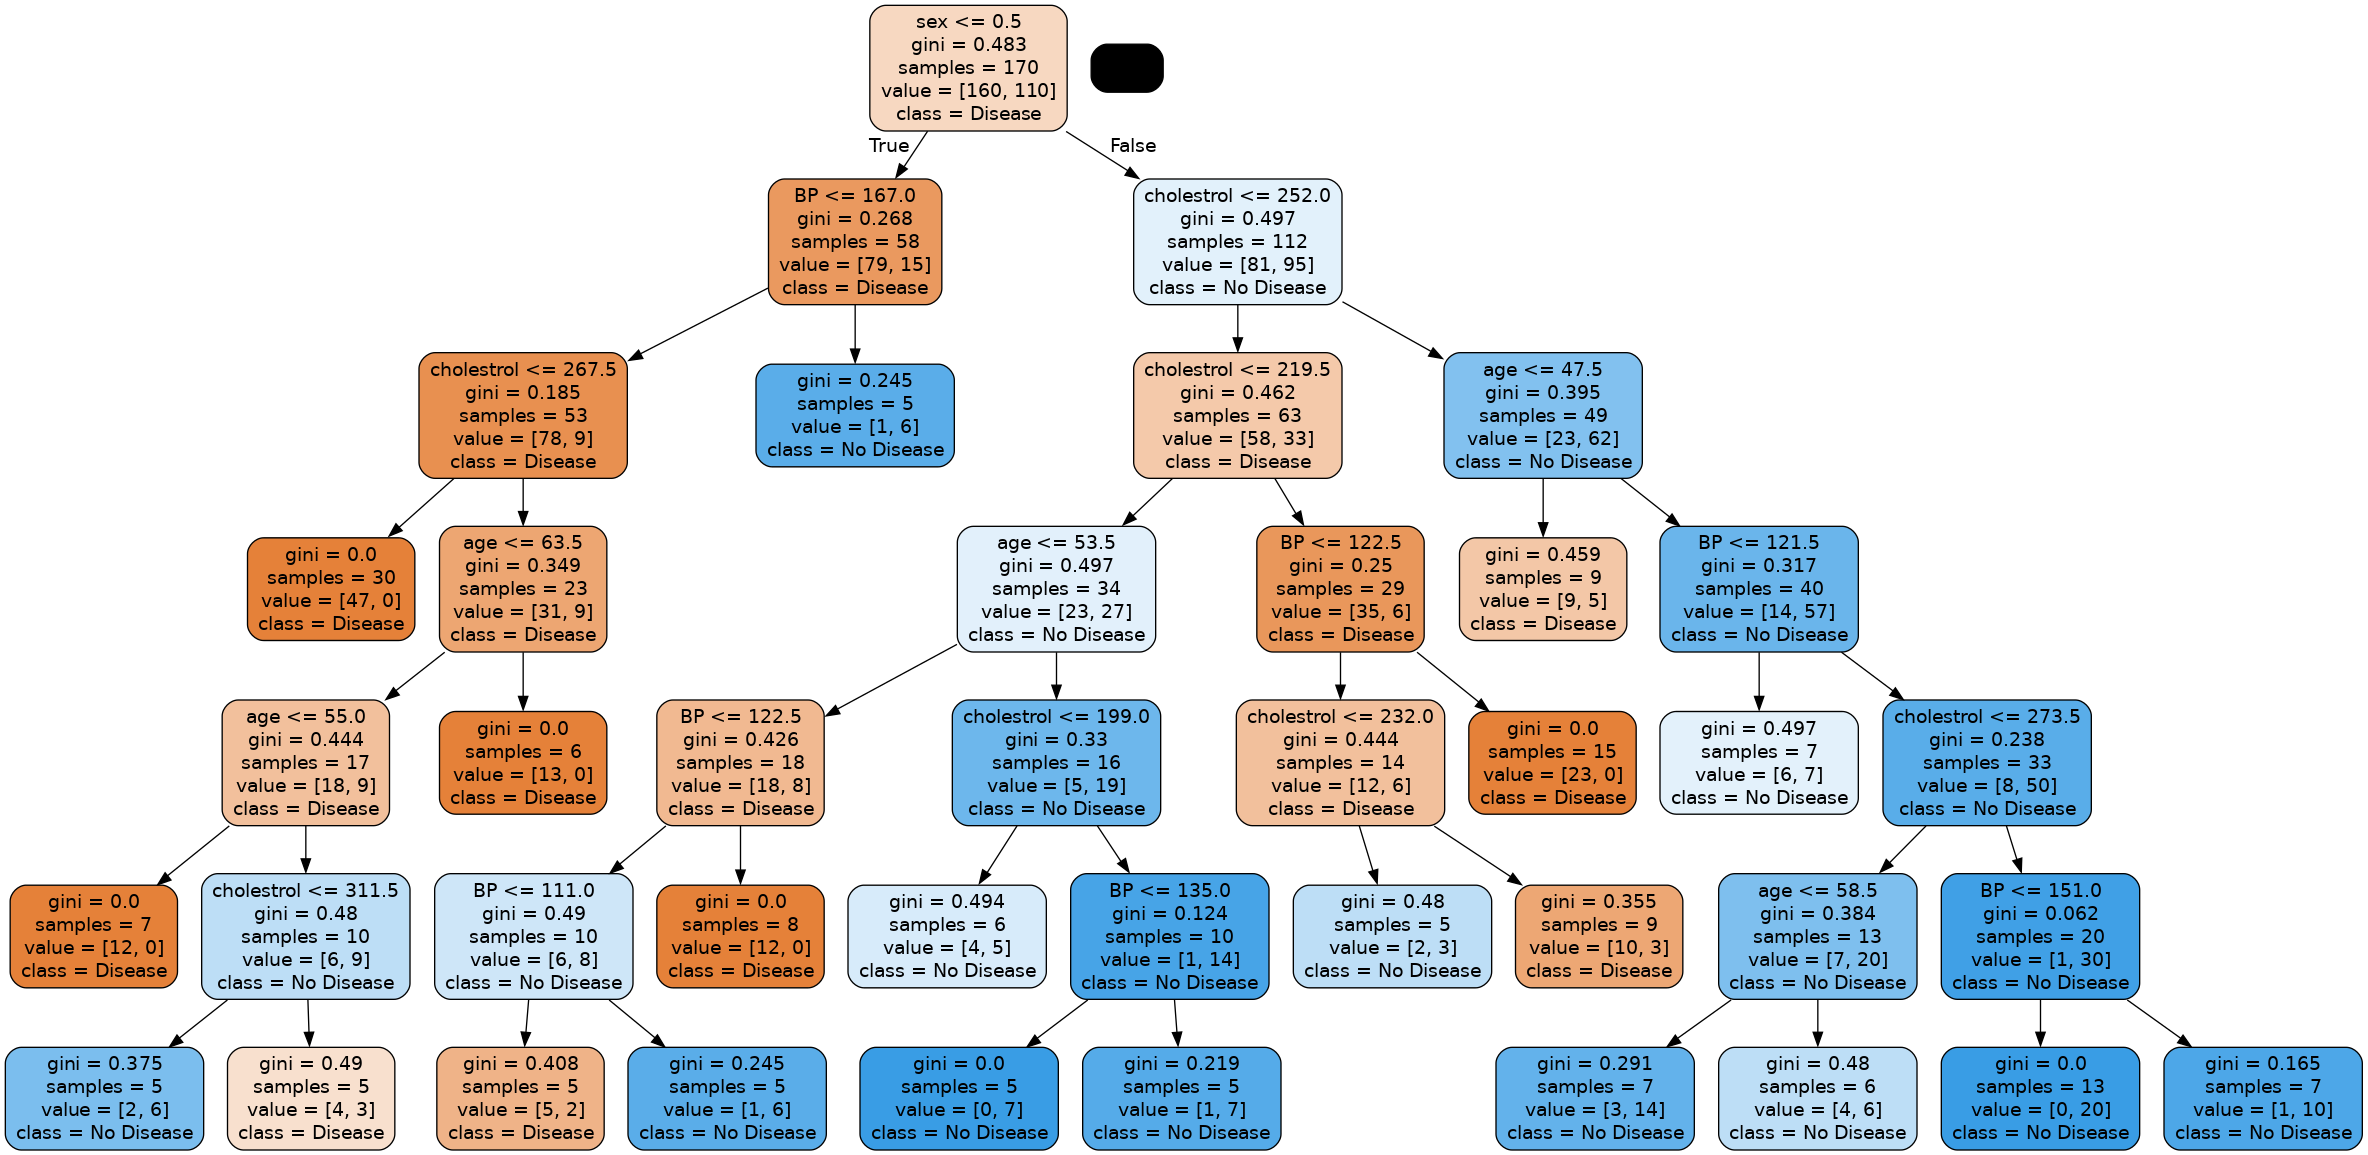

In [292]:
gph = get_dt_graph(rf_best.estimators_[10])
Image(gph.create_png(), height=600, width=600)

### Variable importance in RandomForest and Decision trees

In [293]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [294]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [295]:
classifier_rf.feature_importances_

array([0.37539743, 0.13780788, 0.20834585, 0.27844883])

In [296]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [297]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
0         age  0.375397
3  cholestrol  0.278449
2          BP  0.208346
1         sex  0.137808